In [3]:
%matplotlib inline
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
datasetTweetsCSVPath = "./dataset/tweets.csv"
datasetUsersCSVPath  = "./dataset/users.csv"

# Users

For each attribute
- check correlation we have with other attributes. Above 0.75 you should drop a column
- watch distribution (bars for categorical, instograms for numbers)
- scatter plots for numerical attributes
- boxplots to see outliers. suggestion: group them if needed

In [25]:
%%time
df_users = pd.read_csv(datasetUsersCSVPath, sep=',', index_col=0)

CPU times: user 56.6 ms, sys: 4.45 ms, total: 61 ms
Wall time: 57.1 ms


In [4]:
df_users.head()

,name,lang,bot,created_at,statuses_count
id,,,,,
2353593986,Lamonica Raborn,en,1,2019-02-22 18:00:42,76.0
2358850842,Lourie Botton,en,0,2019-02-26 03:02:32,54.0
137959629,Dadan Syarifudin,en,1,2015-04-30 07:09:56,3.0
466124818,Carletto Focia,it,1,2017-01-18 02:49:18,50.0
2571493866,MBK Ebook,en,0,2019-06-18 19:30:21,7085.0


In [28]:
df_users.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11508 entries, 2353593986 to 933183398
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   name            11507 non-null  object 
 1   lang            11508 non-null  object 
 2   bot             11508 non-null  int64  
 3   created_at      11508 non-null  object 
 4   statuses_count  11109 non-null  float64
dtypes: float64(1), int64(1), object(3)
memory usage: 539.4+ KB


In [5]:
df_users.dtypes

name               object
lang               object
bot                 int64
created_at         object
statuses_count    float64
dtype: object

In [65]:
df_users.mode()

,name,lang,bot,created_at,statuses_count
0,Sara,en,1,2017-06-25 15:33:05,43.0


## Index

In [6]:
len(df_users.index)

11508

In [7]:
df_users.index.dtype

dtype('int64')

## Name

In [66]:
print(len(df_users.name.unique()), "unique names") # please remember to do correlation between id and name and drop column if needed

11361 unique names


In [67]:
print(df_users.name.isna().sum(), "missing names")
df_users[df_users.name.isna()]
# todo in the future: figure out the most common name that the users with 'en' language have

1 missing names


,name,lang,bot,created_at,statuses_count
id,,,,,
2166124159,NaN,en,0,2018-11-02 06:39:14,6566.0


## Lang

In [19]:
uniqueLanguages = df_users.lang.unique()
uniqueLanguages

array(['en', 'it', 'fr', 'ru', 'es', 'tr', 'en-gb', 'pt', 'nl', 'id',
       'zh-tw', 'ja', 'de', 'ko', 'en-AU', 'da', 'ar', 'en-GB',
       'Select Language...', 'zh-TW', 'zh-cn', 'pl', 'el', 'fil', 'sv',
       'xx-lc'], dtype=object)

In [6]:
print(df_users.lang.isna().sum(), "missing languages")

0 missing languages


In [71]:
print(len(uniqueLanguages), "unique languages")

26 unique languages


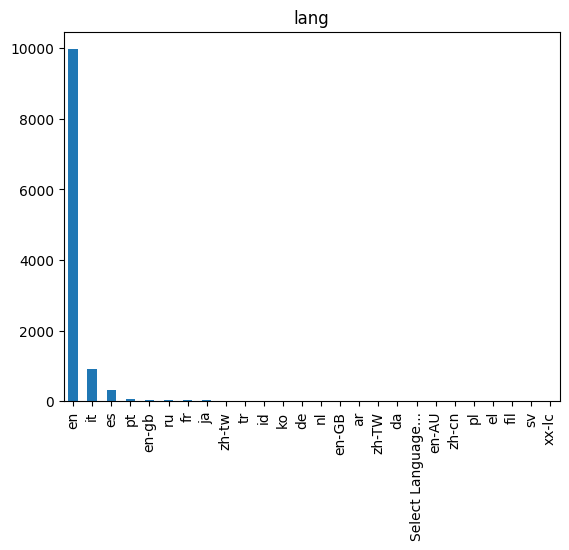

In [11]:
df_users.lang.value_counts().plot(kind='bar', title='lang') 
plt.show()

In [10]:
languages_count = df_users.lang.value_counts()
languages_count

en                    9970
it                     906
es                     319
pt                      65
en-gb                   50
ru                      42
fr                      36
ja                      33
zh-tw                   17
tr                      14
id                      12
ko                       9
de                       8
nl                       6
en-GB                    4
ar                       3
zh-TW                    3
da                       2
Select Language...       2
en-AU                    1
zh-cn                    1
pl                       1
el                       1
fil                      1
sv                       1
xx-lc                    1
Name: lang, dtype: int64

In [137]:
invalidLanguageUsers = languages_count['Select Language...'] + languages_count['xx-lc']
print("There are 2 invalid languages, 'Select Language...' and 'xx-lc'. There is a total of", invalidLanguageUsers, "users with invalid entries")

There are 2 invalid languages, 'Select Language...' and 'xx-lc'. There is a total of 3 users with invalid entries


In [139]:
usersWithInvalidLanguage = df_users.query("lang == 'Select Language...' | lang == 'xx-lc'")
usersWithInvalidLanguage

,name,lang,bot,created_at,statuses_count
id,,,,,
2956613720,Leanne Arker,Select Language...,0,2020-01-05 00:09:59,57.0
2904858613,Brooke,Select Language...,0,2019-11-22 05:44:46,85.0
29552151,Chloe,xx-lc,0,2014-04-09 21:36:02,15398.0


In [78]:
print(df_users.lang.isna().sum(), "missing languages")

0 missing languages


## Bot

In [92]:
df_users.bot.unique()

array([1, 0])

In [89]:
df_users.bot.value_counts()

1    6116
0    5392
Name: bot, dtype: int64

In [95]:
print(df_users.bot.isna().sum(), "missing bot attributes")

0 missing bot attributes


In [17]:
bots=df_users[df_users.bot==1]
print(len(bots.lang.unique()), "languages 'spoken' by bots:", bots.lang.unique())

14 languages 'spoken' by bots: ['en' 'it' 'fr' 'ru' 'es' 'pt' 'tr' 'ko' 'de' 'id' 'ja' 'nl' 'zh-cn'
 'en-gb']


In [23]:
print("Bots don't speak the following languages:", [language for language in uniqueLanguages if language not in bots.lang.unique()])

Bots don't speak the following languages: ['zh-tw', 'en-AU', 'da', 'ar', 'en-GB', 'Select Language...', 'zh-TW', 'pl', 'el', 'fil', 'sv', 'xx-lc']


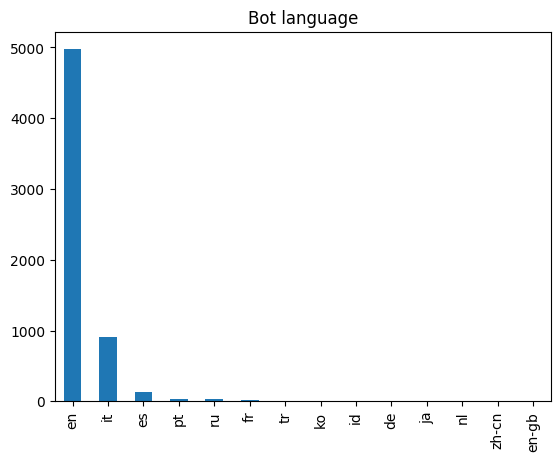

In [14]:
bots.lang.value_counts().plot(kind='bar', title='Bot language') 
plt.show()

In [8]:
df_users.describe()

,bot,statuses_count
count,11508.000000,11109.000000
mean,0.531456,5883.312359
std,0.499031,19073.007305
min,0.000000,0.000000
25%,0.000000,41.000000
50%,1.000000,68.000000
75%,1.000000,2916.000000
max,1.000000,399555.000000


In [9]:
df_users['bot'].unique()

array([1, 0])

In [10]:
df_users["statuses_count"].apply(float.is_integer).all()

False

In [11]:
#joined_df=pd.merge(df_tweets, df_users, left_on='user_id', right_on='id')
#joined_df

# Tweets

In [12]:
df_tweets = pd.read_csv(datasetTweetsCSVPath, sep=',', index_col=0)

In [13]:
numberOfRows, numberOfColumns = df_tweets.shape
print("rows =", numberOfRows)
print("columns =", numberOfColumns)

rows = 13664696
columns = 9


In [14]:
df_tweets.head()

,user_id,retweet_count,reply_count,favorite_count,num_hashtags,num_urls,num_mentions,created_at,text
id,,,,,,,,,
509354017856950272,327746321,0,0,0,0,0,0,2019-09-11 14:53:55,"If man is a little lower than angels, then ang..."
583002592529121280,333722906,1,0,0,0,0,1,2020-04-01 20:27:04,"""@BestWSHHVids: how do you say these words wit..."
461498835362013185,2379755827,0,0,0,0,0,1,2019-05-02 13:34:31,@LOLatComedy awsome
528808127366692864,466226882,0,0,0,0,0,0,2019-11-04 07:17:37,Stephen Hawkins: i buchi neri non esistono se ...
575336690904006656,1355537995,114,0,0,1,0,1,2020-03-11 16:45:31,RT @tibbs_montris: So ready for Wednesday!


In [15]:
df_tweets.dtypes

user_id           object
retweet_count     object
reply_count       object
favorite_count    object
num_hashtags      object
num_urls          object
num_mentions      object
created_at        object
text              object
dtype: object

In [16]:
df_tweets.info()

<class 'pandas.core.frame.DataFrame'>
Index: 13664696 entries, 509354017856950272 to 486479812614451200
Data columns (total 9 columns):
 #   Column          Dtype 
---  ------          ----- 
 0   user_id         object
 1   retweet_count   object
 2   reply_count     object
 3   favorite_count  object
 4   num_hashtags    object
 5   num_urls        object
 6   num_mentions    object
 7   created_at      object
 8   text            object
dtypes: object(9)
memory usage: 1.0+ GB


In [17]:
df_tweets.index.dtype

dtype('O')

In [18]:
df_tweets.isnull().any()

user_id            True
retweet_count      True
reply_count        True
favorite_count     True
num_hashtags       True
num_urls           True
num_mentions       True
created_at        False
text               True
dtype: bool

In [19]:
print("Number of distinct values in user_id: \t\t", len(df_tweets.user_id.unique()), "/", numberOfRows)
print("Number of distinct values in retweet_count:\t", len(df_tweets.retweet_count.unique()), "/", numberOfRows)
print("Number of distinct values in reply_count: \t", len(df_tweets.reply_count.unique()), "/", numberOfRows)
print("Number of distinct values in favorite_count: \t", len(df_tweets.favorite_count.unique()), "/", numberOfRows)
print("Number of distinct values in num_hashtags: \t", len(df_tweets.num_hashtags.unique()), "/", numberOfRows)
print("Number of distinct values in num_urls: \t\t", len(df_tweets.num_urls.unique()), "/", numberOfRows)
print("Number of distinct values in num_mentions: \t", len(df_tweets.num_mentions.unique()), "/", numberOfRows)
print("Number of distinct values in created_at: \t", len(df_tweets.created_at.unique()), "/", numberOfRows)
print("Number of distinct values in text: \t\t", len(df_tweets.text.unique()), "/", numberOfRows)

Number of distinct values in user_id: 		 222286 / 13664696
Number of distinct values in retweet_count:	 229168 / 13664696
Number of distinct values in reply_count: 	 158620 / 13664696
Number of distinct values in favorite_count: 	 158764 / 13664696
Number of distinct values in num_hashtags: 	 104780 / 13664696
Number of distinct values in num_urls: 		 157146 / 13664696
Number of distinct values in num_mentions: 	 131539 / 13664696
Number of distinct values in created_at: 	 8127084 / 13664696
Number of distinct values in text: 		 6778479 / 13664696


In [20]:
distinct_number_of_tweets = len(df_tweets.text.unique())
total_number_of_tweets    = numberOfRows
if (distinct_number_of_tweets == total_number_of_tweets):
    print("There aren't duplicate tweets")
else:
    print("There are duplicate tweets, maybe some missing tweets")

There are duplicate tweets, maybe some missing tweets


In [21]:
df_tweets.describe()

,user_id,retweet_count,reply_count,favorite_count,num_hashtags,num_urls,num_mentions,created_at,text
count,13447413,13227562,13016818,13017154,12607172,13016073,12810531,13664696,13126975
unique,222285,229167,158619,158763,104779,157145,131538,8127084,6778478
top,497404180,0,0,0,0,0,0,2020-04-04 03:43:02,"Ci sedemmo dalla parte del torto, visto che tu..."
freq,4600,9419784,11790440,9467209,10470209,9894198,7561627,133,6932
